Bin Packing Problem - Jakub Szulc grupa 4

In [ ]:
import pygad
import numpy as np 
import time
from csv import writer
import random


# items1 = np.array([1,2,3,4,5])
# items2 = np.array([1,1,1,5,5])
# items3 = np.array([2,8,1,6,3])


# items1 = np.array([1,9,2,8,3,7,4,6,5,5,4,6])
# items2 = np.array([10,10,10,10,10,1,1,1,1,1,2,2])
# items3 = np.array([8,2,9,1,7,3,6,4,5,5,4,6])

items1 = np.array([1,2,3,4,5,6,7,8,9,10,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,10,10,5,4,1])
items2 = np.array([10,10,10,10,10,10,10,10,10,10,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,10,10,5,4,1])
items3 = np.array([8,2,9,1,7,3,6,4,5,5,4,6,8,2,9,1,7,3,6,4,5,5,4,6,8,2,9,1,7,3])

capacity = 10

# gene_space = [1,2,3,4,5]
# gene_space = [1,2,3,4,5,6,7,8,9,10,11,12]
gene_space = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

num_genes=items1.size
num_generations = 20000
num_parents_mating = 100
sol_per_pop = 300
mutation_percent_genes = 12
keep_parents = 15



def fitness_function(solution, solution_idx):
    bins=np.unique(solution)
    num_bins = bins.size

    for i in range(num_bins):
        bin_sum = 0
        for j in range(len(solution)):
            if solution[j] == bins[i]:
                bin_sum += random_items[j]
        if bin_sum > capacity:
            return -100
    
    return num_bins*-1


for i in range(100):
    random_items = random.choice([items1, items2, items3])
    random_items = random_items.reshape(-1, 1)

    start=time.time()
    ga_instance = pygad.GA(num_generations=num_generations,
                        num_parents_mating=num_parents_mating, 
                        fitness_func=fitness_function,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        mutation_percent_genes=mutation_percent_genes,
                        gene_space=gene_space,
                        parent_selection_type="sss",
                        keep_parents=keep_parents,
                        
    )

    ga_instance.run()
    end=time.time()

    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    if solution_fitness*-1 <= 15:
        with open('zeit3.csv', 'a', newline='') as f_object:
            writer_object = writer(f_object)
            writer_object.writerow([end-start, solution_fitness*-1])
            f_object.close()
        print("Najlepsze rozwiązanie: ", solution_fitness*-1)
    else:
        with open('zeit3.csv', 'a', newline='') as f_object:
            writer_object = writer(f_object)
            writer_object.writerow([0, solution_fitness*-1])
            f_object.close()
        # print("Najlepsze rozwiązanie: ", solution)
        # print("Czas: ", end-start)
    # ga_instance.plot_fitness()


W pierwszej wersji mojego rozwiązania Bin Packing Problem opisałem chromosomy w następujący sposób - każdy gen odpowiada za pojedynczy element z listy przedmiotów, a liczba która się tam jest mówi w którym pojemniku się on znajduje. Przyjąłem, że pojemniki są numerowane od 1 do n, gdzie n to liczba przedmiotów (w ten sposób żeby można było zapakować każdy przedmiot do pojedynczego pojemnika).

Funkcja fitness sprawdza ile jest unikatowych liczb - to znaczy ile jest pojemników. Oczywiście im mniej pojemników tym lepszy jest chromosom. Znajduje się tam również sprawdzenie czy łączna wielkość przedmiotów w pojemniku nie przekracza pojemności pojemnika. Jeśli tak to chromosom jest odrzucany. Chromosomy są wybierane na podstawie liczby użytych pojemników.

Inputy przedstawiają się następująco (są to listy przedmiotów o określonych wielkościach):
małe:
1,2,3,4,5
1,1,1,5,5
2,8,1,6,3

średnie:
1,9,2,8,3,7,4,6,5,5,4,6
10,10,10,10,10,1,1,1,1,1,2,2
8,2,9,1,7,3,6,4,5,5,4,6

duże:
1,2,3,4,5,6,7,8,9,10,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,10,10,5,4,1
10,10,10,10,10,10,10,10,10,10,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,10,10,5,4,1
8,2,9,1,7,3,6,4,5,5,4,6,8,2,9,1,7,3,6,4,5,5,4,6,8,2,9,1,7,3


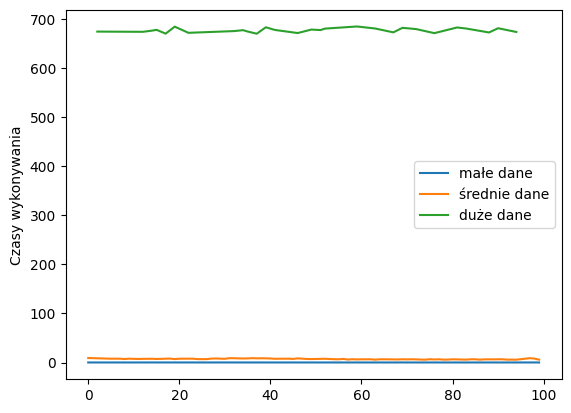

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('zeit1.csv', header=None)
df2 = pd.read_csv('zeit2.csv', header=None)
df3 = pd.read_csv('zeit3.csv', header=None)

df1 = df1[df1[0] != 0]
df2 = df2[df2[0] != 0]
df3 = df3[df3[0] != 0]

plt.plot(df1[0], label='małe dane')
plt.plot(df2[0], label='średnie dane')
plt.plot(df3[0], label='duże dane')

plt.legend()
plt.ylabel('Czasy wykonywania')

plt.show()

Wykres czasów wykonywania prezentuję się tak jak powyżej. Widać, że algorytm działa dobrze dla małych i średnich inputów, ale dla dużych inputów czas wykonania jest stosunkowo długi.

In [5]:
import pandas as pd

df1 = pd.read_csv('zeit1.csv', header=None)
df2 = pd.read_csv('zeit2.csv', header=None)
df3 = pd.read_csv('zeit3.csv', header=None)

n_zeros_1 = len(df1[df1[0] == 0])
n_zeros_2 = len(df2[df2[0] == 0])
n_zeros_3 = len(df3[df3[0] == 0])

mean_time_1 = df1[df1[0] != 0][0].mean()
mean_time_2 = df2[df2[0] != 0][0].mean()
mean_time_3 = df3[df3[0] != 0][0].mean()

result_1 = 100 - n_zeros_1
result_2 = 100 - n_zeros_2
result_3 = 100 - n_zeros_3

print(f'Dokładność dla małych danych: {result_1}%')
print(f'Średni czas wykonania dla małych danych: {mean_time_1:.4f}s')
print(f'Dokładność dla średnich danych: {result_2}%')
print(f'Średni czas wykonania dla średnich danych: {mean_time_2:.4f}s')
print(f'Dokładność dla dużych danych: {result_3}%')
print(f'Średni czas wykonania dla dużych danych: {mean_time_3:.4f}s')

Dokładność dla małych danych: 100%
Średni czas wykonania dla małych danych: 0.2515s
Dokładność dla średnich danych: 86%
Średni czas wykonania dla średnich danych: 7.3363s
Dokładność dla dużych danych: 28%
Średni czas wykonania dla dużych danych: 676.7421s


Jak widać dla małych i średnich inputów algorytm działa dobrze i dokładność jest akceptowalna, natomiast dla dużych inputów jest on już niezbyt dokładny, ponieważ dane te są już na prawdę duże jak i czasy wykonywania są znaczące (wynika to z dużej liczby generacji i osobników w populacji). Podsumowując, uważam że nie można jednoznacznie określić czy algorytm działa dobrze czy źle, ponieważ zależy to od danych wejściowych. Dla małych i średnich inputów algorytm działa dobrze, natomiast dla dużych inputów jest on już niezbyt dokładny. Stąd też stwierdzam, że działa on średnio.

In [ ]:
import pygad
import numpy as np 
import time
from csv import writer
import random

# items1 = np.array([1,2,3,4,5])
# items2 = np.array([1,1,1,5,5])
# items3 = np.array([2,8,1,6,3])


items1 = np.array([1,9,2,8,3,7,4,6,5,5,4,6])
items2 = np.array([10,10,10,10,10,1,1,1,1,1,2,2])
items3 = np.array([8,2,9,1,7,3,6,4,5,5,4,6])

# items1 = np.array([1,2,3,4,5,6,7,8,9,10,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,10,10,5,4,1])
# items2 = np.array([10,10,10,10,10,10,10,10,10,10,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,10,10,5,4,1])
# items3 = np.array([8,2,9,1,7,3,6,4,5,5,4,6,8,2,9,1,7,3,6,4,5,5,4,6,8,2,9,1,7,3])

# items1 = items1.reshape(-1, 1)

capacity = 10

gene_space = [0,1]
num_genes=items1.size*items1.size
num_generations = 20000
num_parents_mating = 100
sol_per_pop = 300
mutation_percent_genes = 10
keep_parents = 15


def fitness_function(solution, solution_idx):
    bins_divided= [solution[i:i+5] for i in range(0, len(solution), 5)]
    empty_bins=0
    num_bins = len(bins_divided)

    for i in range(len(random_items)):
        check = 0
        for j in range(len(bins_divided)):
            if bins_divided[j][i] == 1:
                check+=1
            if j==len(bins_divided[i])-1 and check == 0 or check > 1:
                return -100

    for i in range(len(bins_divided)):
        bin_sum = 0
        is_all_zero = np.all((bins_divided[i] == 0))
        if is_all_zero:
            empty_bins+=1
        for j in range(len(random_items)):
            if bins_divided[i][j] == 1:
                bin_sum += random_items[j]
        if bin_sum > capacity:
            return -100
    
    return (num_bins-empty_bins)*-1

for i in range (100):
    random_items = random.choice([items1, items2, items3])
    random_items = random_items.reshape(-1, 1)

    start=time.time()
    ga_instance = pygad.GA(num_generations=num_generations,
                        num_parents_mating=num_parents_mating, 
                        fitness_func=fitness_function,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        mutation_percent_genes=mutation_percent_genes,
                        gene_space=gene_space,
                        parent_selection_type="sss",
                        keep_parents=keep_parents,
    )

    ga_instance.run()
    end=time.time()

    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    if solution_fitness*-1 <= 6:
        with open('zeit2inaczej.csv', 'a', newline='') as f_object:
            writer_object = writer(f_object)
            writer_object.writerow([end-start, solution_fitness*-1])
            f_object.close()
        print("Najlepsze rozwiązanie: ", solution_fitness*-1)
    else:
        with open('zeit2inaczej.csv', 'a', newline='') as f_object:
            writer_object = writer(f_object)
            writer_object.writerow([0, solution_fitness*-1])
            f_object.close()


Druga wersja algorytmu przedstawia się następująco: chromosomy są zakodowane jako ciągi zer i jedynek gdzie każde kolejne n genów (n to liczba przedmiotów) odpowiada za jeden pojemnik. Zero oznacza w tym przypadku że przedmiot o indeksie odpowiadającym kolejności w tym podciągu nie jest w tym pojemniku, natomiast 1 oznacza że jest. W tym przypadku funkcja fitness sprawdza czy łączna wielkość przedmiotów w pojemniku nie przekracza pojemności pojemnika. Jeśli tak to chromosom jest odrzucany. Funkcja musi również sprawdzać czy każdy przedmiot jest zapakowany do pojemnika tylko raz.Chromosomy są wybierane na podstawie liczby użytych pojemników.

Inputy są takie same jak w poprzednim przypadku.

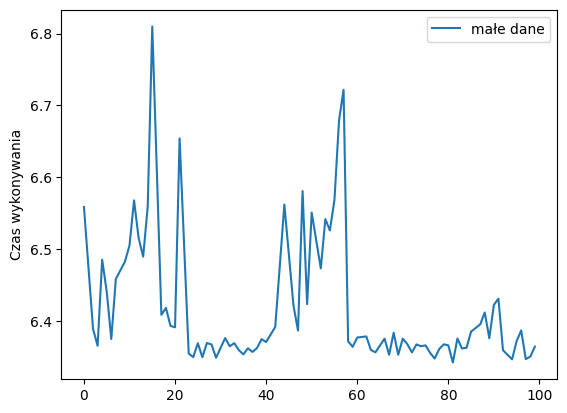

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('zeit1inaczej.csv', header=None)

df1 = df1[df1[0] != 0]

plt.plot(df1[0], label='małe dane')

plt.legend()
plt.ylabel('Czas wykonywania')

plt.show()

In [7]:
import pandas as pd

df1 = pd.read_csv('zeit1inaczej.csv', header=None)

n_zeros_1 = len(df1[df1[0] == 0])

mean_time_1 = df1[df1[0] != 0][0].mean()

result_1 = 100 - n_zeros_1

print(f'Dokładność dla małych danych: {result_1}%')
print(f'Średni czas wykonania dla małych danych: {mean_time_1:.4f}s')

Dokładność dla małych danych: 87%
Średni czas wykonania dla małych danych: 6.4170s


Po próbach z drugim algorytmem okazało się, że jest on znacznie wolniejszy niż pierwszy. Dlatego też nie przedstawiam tutaj wykresów czasów wykonywania dla średnich i dużych inputów. Niestety już dla średnich inputów 10 przykładów liczyło się 4 godziny, a i tak wyniki były bardzo niedokładne, co wynika z faktu, że w tym przypadku chromosomy mają już długość 12*12 czyli 144 co znacząco wpływa na czas wykonywania algorytmu. Wniosek z tego jest taki, że ten model działa sensownie jedynie dla małych danych.

Podsumowując - algorytm 1 okazał się znacząco lepszy od algorytmu 2. Może nie oblicza zbyt szybko i dokładnie rozwiązań dla dużych inputów, ale dla małych i średnich inputów jest on znacznie lepszy, a algorytm 2 jest o wiele wolniejszy i nie nadaje się już do liczenia nawet średnich inputów co wynika w dużej mierze z wielkości chromosomów jak i większego rozbudowania funkcji fitness.